# Shimming Algorithm Script

## Introduction and *rules*

This shimming algorithm script is completely based off the available codes in the following github repository:

https://github.com/rst030/cosi-measure/tree/master/Software/COSI2

And all its use follows CERN OHL V.1.2 License. 

The following folder structure must be followed in order to run the code, and get the correct outputs (images and pdf files):

<pre>
MainFolder/
├── data/
│   ├── measured_map.csv
│   └── tmp/
├── pics/
├── utils/
│   └── shimming_magnet.py
├── Shimming_Algorithm.py
├── b0.py
├── b0V5.py
├── osi2magnet.py
└── pth.py
</pre>

With measured_map.csv the field map measured for the magnet, and the rest of the .py files are available in the repository mentioned.

### Small Euler Rotation Test

The following code just tests the Euler Rotation used afterwards to rotate the magnets!

In [2]:
#euler test
import numpy as np

r = np.asarray([1,0,0])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

#angle _ test
a = 90
b = 0
y = -90

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)

r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

[1 0 0]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.22044605e-16  2.22044605e-16]]
[ 2.22044605e-16  2.22044605e-16 -1.00000000e+00]


## Importing and Visualizing Map

### Import Map

We first import field map measured, using the route we have mentioned

In [3]:
import numpy as np  
import b0
b0map_iter1 = b0.b0() # We create out B0 object, iteration 1

filename_to_import_csv_data_from = r'./data/240912_ball_overnight_R120_12pts_bvals_shifted.csv' #Importing the dataset, we are using one avaible at the repository linked above

b0map_iter1.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90]) # We rotate it 

# Adjust the stepsize to the one you have
b0map_iter1.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.5,stepsize=10,onesign=True,component=0) # volume from shell init

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240912_ball_overnight_R120_12pts_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240907/240912_ball_overnight_R120_12pts,,,,,,
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file
ROTATING THE PATH 

c:\Users\jarc4\Desktop\Ingenieria UC\IPRE\LowCost-MRI\Ilias Optimization Code\b0.py:323: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,component])>filtering:


[[-47.432  -2.01   -0.49   47.477]]
mean:  47.32834743625666
-1.0020844286582415
[[-47.427  -2.02   -0.51   47.473]]
mean:  47.32834743625666
-1.0020632996720384
[[-47.426  -2.04   -0.52   47.472]]
mean:  47.32834743625666
-1.002126686630648
[[-47.429  -2.03   -0.52   47.475]]
mean:  47.32834743625666
-1.002253460547867
[[-47.435  -2.04   -0.54   47.482]]
mean:  47.32834743625666
-1.0025281373685082
[[-47.448  -2.05   -0.53   47.496]]
mean:  47.32834743625666
-1.002971846078775
[[-47.469  -2.06   -0.54   47.517]]
mean:  47.32834743625666
-1.003436683775245
[[-47.491  -2.08   -0.54   47.539]]
mean:  47.32834743625666
-1.0037747475544958
[[-47.507  -2.07   -0.54   47.557]]
mean:  47.32834743625666
-1.0033732968166356
[[-47.488  -2.07   -0.53   47.543]]
mean:  47.32834743625666
-1.0031831359408068
[[-47.479  -2.05   -0.54   47.526]]
mean:  47.32834743625666
-1.0026971692581337
[[-47.456  -2.04   -0.51   47.512]]
mean:  47.32834743625666
-1.0025281373685082
[[-47.448  -2.05   -0.52   47.49

### Plotting Initial Field

We now plot the initial RAW field, what we have measured, and save it as 2d fields 

19.254201590324808
mean, mT:  -47.49468006182381
low, mT: -47.675 
high, mT: -47.367


<Figure size 640x480 with 0 Axes>

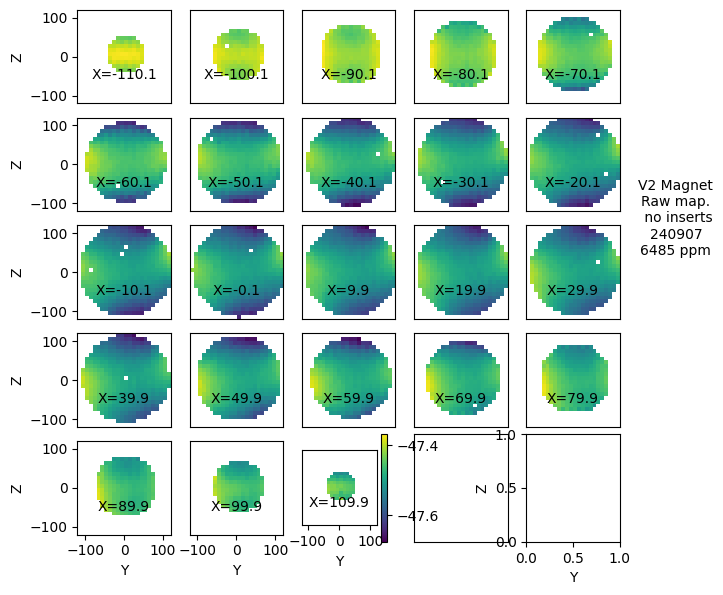

In [4]:
from matplotlib import pyplot as plt
plt.figure(0)

# Values
xvals_raw = b0map_iter1.xPts
y = b0map_iter1.yPts
z = b0map_iter1.zPts

FieldMeasured_init = b0map_iter1.b0Data[:,:,:,0]


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7, 7))

# Statistics and length
print((len(b0map_iter1.path.r))**(1/3))
print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

# Initial homogeneity used as "base"
homoinit = (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6


# Start plotting! 
for i in range(5):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.8, 3, 'V2 Magnet\nRaw map.\n no inserts\n240907\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured_init),np.nanmax(FieldMeasured_init)],origin = 'lower',extent=[-120,120,-120,120])
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xPts[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)

## Spherical Harmonics Decomposition

Spherical Harmonics is a method used to solve partial differential equatins, like the Laplace equation that the scalar potential must satisfy, and where you can get the magnetic field (in free space). Thus, spherical harmonic decomposition could be used to model the magnetic field. 

In our case, the decomposition allows to interpolate the magnetic field from the boundary of the measurements, in this case a sphere. This not only could allow a quicker measure process, but also interpolate what should happen inside the boundary and partially fixing experimental errors in the measuring process, allowing a potential better analysis and shimming. 

### Decomposition

In [5]:
# Spherical decomposition
diameter_of_sphere = b0map_iter1.path.radius*2

# Order and resolution could be changed, but could potentially be affected by choosing higher or lower.
order = 11
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_iter1.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=5
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter1.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)

240.00573911701895
[23, 24, 24]
Mean field strength in 24 cm sphere: -47.49 mT
Inhomogeneity in 24 cm sphere: -6485 ppm
Inhomogeneity of fit: 6861 ppm
Error: -1741 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 11, resol 5 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 7108 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


### Checking the interpolation

Now, we check the interpolation's grid size, as well as check the preliminary minimum, maximum, mean and homogeneity of the original data and the interpolation (to compare)

In [6]:
# interpolated check
i=4
j=int(len(b0map_iter1.yDim_SPH_fine)/2)-3
k=-4#int(len(b0map_iter1.zDim_SPH_fine)/2)

print('xfine',b0map_iter1.xDim_SPH_fine[i])
print('yfine',b0map_iter1.yDim_SPH_fine[j])
print('zfine',b0map_iter1.zDim_SPH_fine[k])
print('B0interp',b0map_iter1.interpolatedField[i,j,k])

coordinate_grid = b0map_iter1.coord_grid_fine
xx = coordinate_grid[0]
yy = coordinate_grid[1]
zz = coordinate_grid[2]

print('x grid',xx[i,j,k])
print('y grid',yy[i,j,k])
print('z grid',zz[i,j,k])

print("\nNow printing min and max\n")
print(np.nanmin(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmax(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmin(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmax(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmin(b0map_iter1.interpolatedField))
print(np.nanmax(b0map_iter1.interpolatedField))

xfine -100.0023912987579
yfine -15.000358694813684
zfine 105.00251086369579
B0interp nan
x grid -15.000358694813684
y grid -100.0023912987579
z grid 105.00251086369579

Now printing min and max

-47.675
0.0
-47.675
-47.367
-47.66603589622701
-47.3284662280477


### Plotting interpolated and raw

Now, we can print the interpolated field, as well as compare the raw and interpolated fields (both in 2D as well as through each axis)

mean, mT:  -47.49254835563982
low, mT: -47.66603589622701 
high, mT: -47.3284662280477


<Figure size 640x480 with 0 Axes>

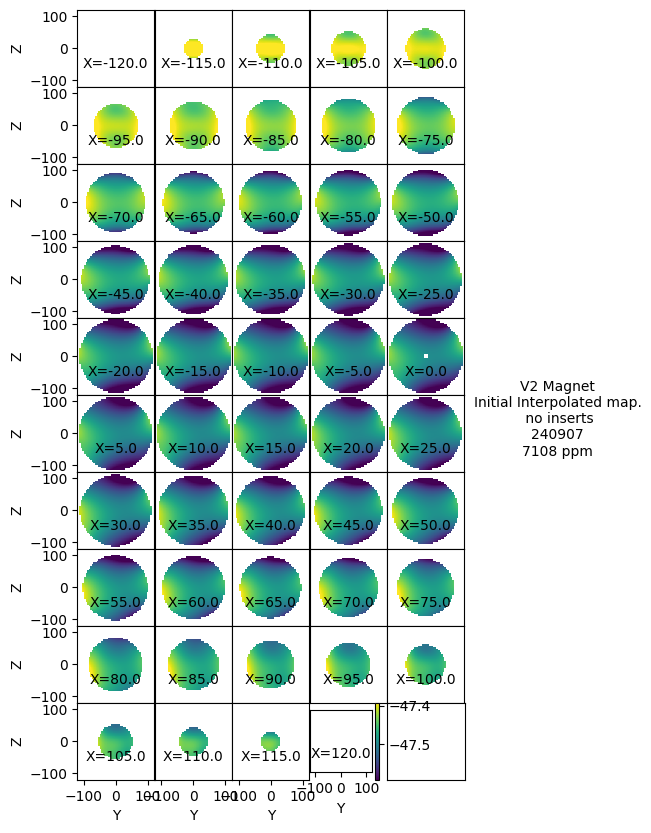

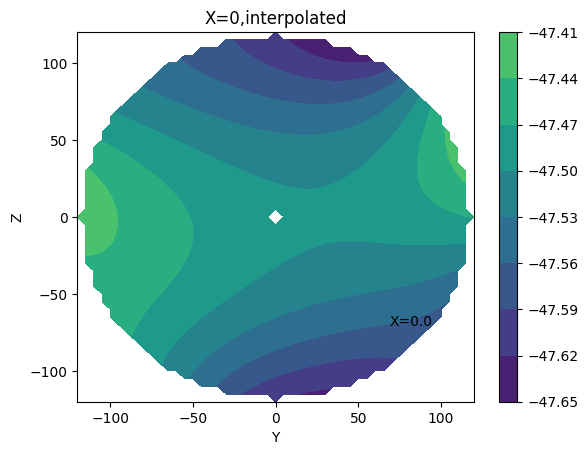

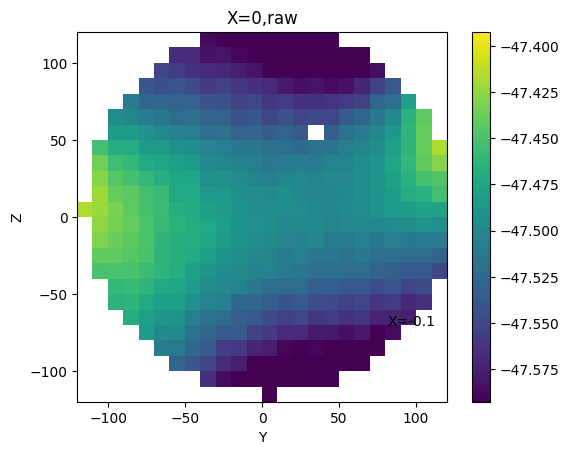

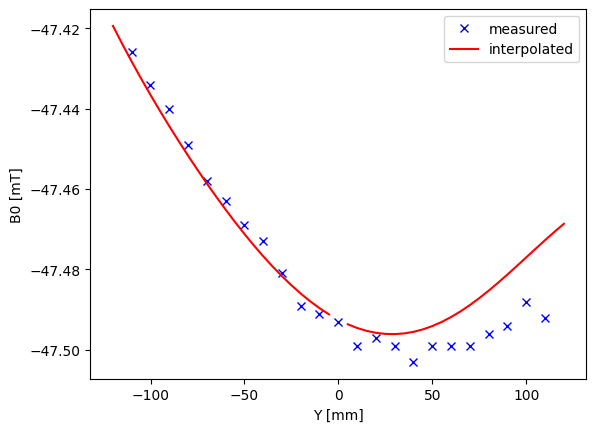

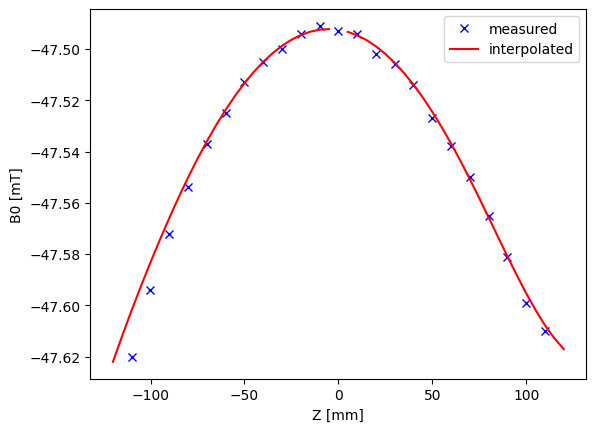

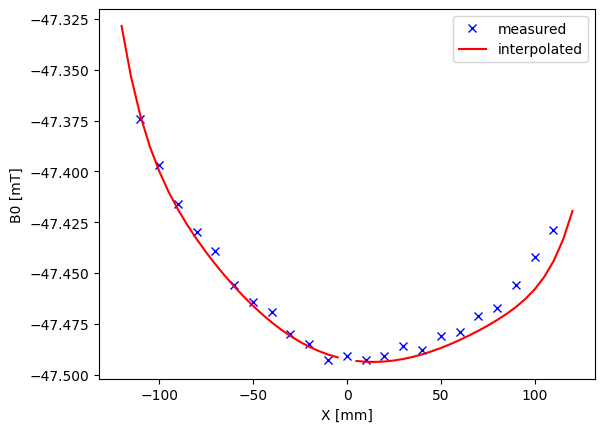

In [7]:
# initial field (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter1.yDim_SPH_fine
y = b0map_iter1.yDim_SPH_fine
z = b0map_iter1.zDim_SPH_fine

FieldMeasured_init = b0map_iter1.interpolatedField 

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

homoinit = (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.2, 5, '\n\n\nV2 Magnet\nInitial Interpolated map.\n no inserts\n240907\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_init)-0.1,np.nanmean(FieldMeasured_init)+0.1],origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xDim_SPH_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0, interpolated
xsliceidx_finegrid = int(len(b0map_iter1.xDim_SPH_fine)/2)
plt.contourf(y,z,np.transpose(FieldMeasured_init[xsliceidx_finegrid,:,:]),vmin=np.nanmin(FieldMeasured_init),vmax=np.nanmax(FieldMeasured_init))
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xDim_SPH_fine[xsliceidx_finegrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('X=0,interpolated')
plt.colorbar()
plt.show()

# plot at x=0, raw
xsliceidx_rawgrid = int(len(b0map_iter1.xPts)/2)
plt.imshow(np.transpose(b0map_iter1.b0Data[xsliceidx_rawgrid,:,:,0]),clim=[np.nanmean(FieldMeasured_init)-0.1,np.nanmean(FieldMeasured_init)+0.1],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xPts[xsliceidx_rawgrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('X=0,raw')
plt.colorbar()
plt.show()

# plot b0 through y axis, for raw and interpolated
b0_along_y_at_z0_raw = b0map_iter1.b0Data[xsliceidx_rawgrid,:,xsliceidx_rawgrid,0]
b0_along_y_at_z0_fine = FieldMeasured_init[xsliceidx_finegrid,:,xsliceidx_finegrid]
yvals_raw = b0map_iter1.yPts
yvals_fine = b0map_iter1.yDim_SPH_fine

plt.plot(yvals_raw,b0_along_y_at_z0_raw,'bx')
plt.plot(yvals_fine,b0_along_y_at_z0_fine,'r')
plt.legend(['measured','interpolated'])
plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()


# plot b0 through z axis, for raw and interpolated
b0_along_z_at_xy0_raw = b0map_iter1.b0Data[xsliceidx_rawgrid,xsliceidx_rawgrid,:,0]
b0_along_z_at_xy0_fine = FieldMeasured_init[xsliceidx_finegrid,xsliceidx_finegrid,:]
zvals_raw = b0map_iter1.zPts
zvals_fine = b0map_iter1.zDim_SPH_fine

plt.plot(zvals_raw,b0_along_z_at_xy0_raw,'bx')
plt.plot(zvals_fine,b0_along_z_at_xy0_fine,'r')
plt.legend(['measured','interpolated'])
plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()


# plot b0 through x axis, for raw and interpolated
b0_along_x_at_yz0_raw = b0map_iter1.b0Data[:,xsliceidx_rawgrid,xsliceidx_rawgrid,0]
b0_along_x_at_yz0_fine = FieldMeasured_init[:,xsliceidx_finegrid,xsliceidx_finegrid]
xvals_raw = b0map_iter1.xPts
xvals_fine = b0map_iter1.xDim_SPH_fine

plt.plot(xvals_raw,b0_along_x_at_yz0_raw,'bx')
plt.plot(zvals_fine,b0_along_x_at_yz0_fine,'r')
plt.legend(['measured','interpolated'])
plt.ylabel('B0 [mT]')
plt.xlabel('X [mm]')
plt.show()

## Shimming Magnets Positions

### Generating the positions

We first must generate the shimming magnet positions. In order to do this, we have to set it's configuration, like the amount of rings to be used, positions, trays occupied, etc.!

In [8]:
#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          =276*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-13,-5,1,13]  # Ring positions to be occupied! In this case, we are going for a 4 ring approach and those positions, but thats up to you!

ringPositions       = ringposFromTrayNr(trays_occupied)

print('rings at ',np.array(ringPositions)*1e3,'mm')

magsPerSegment      = 7  # number of magnets per shim tray segment

anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)

numSegments         = 12 #corresponds to the number of shim trays

segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []

for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print('x',pos[0],'y',pos[1],'z',pos[2])

rings at  [-112.5  -40.5    4.5  112.5] mm
let us position some magnets on a circumference of a R=276 mm YZ circle with X=0
336
x -0.11249999999999999 y 0.27211479674710887 z -0.04614691096140277
x -0.11249999999999999 y 0.2742709847847707 z -0.030845208788272026
x -0.11249999999999999 y 0.27556740718070843 z -0.015446815196073495
x -0.11249999999999999 y 0.276 z 0.0
x -0.11249999999999999 y 0.27556740718070843 z 0.0154468151960735
x -0.11249999999999999 y 0.2742709847847707 z 0.030845208788272037
x -0.11249999999999999 y 0.27211479674710887 z 0.04614691096140277
x -0.11249999999999999 y 0.2587317822093368 z 0.09609300117480107
x -0.11249999999999999 y 0.2529482447387227 z 0.11042275799670676
x -0.11249999999999999 y 0.2463717826715406 z 0.12440636922299107
x -0.11249999999999999 y 0.2390230114445051 z 0.13799999999999998
x -0.11249999999999999 y 0.2309249674754671 z 0.15116103795771738
x -0.11249999999999999 y 0.22210303595045067 z 0.16384822678806393
x -0.11249999999999999 y 0.212584

### Plotting positions

We can see how the magnets are gonna look like in one ring!

Text(0, 0.5, 'Z')

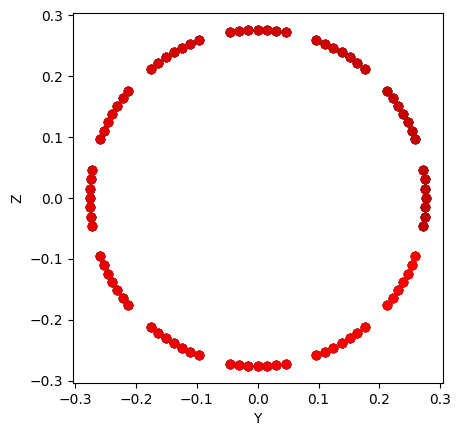

In [9]:
import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])
    
axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')

## Shim Magnet Fields

### Magnet characteristics

Here, you can change and specify the magnets to be used in the shimming. In order to do the shimming, we approximate the magnets as dipoles!

In [10]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets

numMags = len(positions)
coordinate_grid = b0map_iter1.coord_grid_fine

magnetFields = np.zeros((np.shape(FieldMeasured_init)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(FieldMeasured_init)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    # Next comment was written by the original writer:

    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

DSV = 2*max(b0map_iter1.xDim_SPH_fine)#b0map.path.radius*2, will be used forwards!

### Single magnet setting and rendering

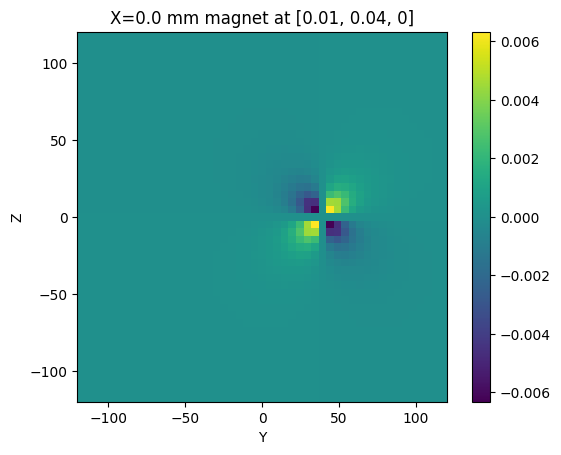

In [11]:
# We first define the moment and vector of each dipole to be created

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0])

# Function to create magnets and its created field
def NEW_singleMagnet(position,dipoleVector,xPts,yPts,zPts):
    '''
    renders 3 components o the field of one magnet in a cubic grid made of xPts, yPts and zPts
    '''
    x,y,z = np.meshgrid(xPts, yPts, zPts, indexing='xy')  
    coord = [x,y,z]
    
    B0 = B0 = np.zeros((len(xPts),len(yPts),len(zPts))+(3,), dtype=np.float32)
    for i in range(len(xPts)):
        for j in range(len(yPts)):
            for k in range(len(zPts)):
                x_i = xPts[i]*1e-3-position[0]
                y_j = yPts[j]*1e-3-position[1]
                z_k = zPts[k]*1e-3-position[2]
                
                rabs = np.sqrt((x_i)**2+(y_j)**2+(z_k)**2)
                
                m_x = dipoleVector[0]
                m_y = dipoleVector[1]
                m_z = dipoleVector[2]
                
                B0[i,j,k,0] = 3*x_i*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_x/rabs**3
                B0[i,j,k,1] = 3*y_j*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_y/rabs**3
                B0[i,j,k,2] = 3*z_k*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_z/rabs**3
    
    return B0
    
# We can see the field created of a single magnet!
xpts = b0map_iter1.xDim_SPH_fine
ypts = b0map_iter1.yDim_SPH_fine
zpts = b0map_iter1.zDim_SPH_fine

positionofsinglemagnet = [10e-3,40e-3,0]
onemagnetfield = NEW_singleMagnet(position=positionofsinglemagnet,dipoleVector=dip_vec,xPts = xpts,yPts=ypts,zPts=zpts)     

plt.show()
xsliceidx = int(len(xpts)/2)
plt.imshow(np.transpose(onemagnetfield[xsliceidx,:,:,2]),origin='lower',extent=[np.nanmin(ypts),np.nanmax(ypts),np.nanmin(zpts),np.nanmax(zpts)])
plt.title('X=%.1f mm '%xpts[xsliceidx]+'magnet at '+str(positionofsinglemagnet))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

### Shim magnet rendering

Now, we can create the shimming magnets and visualize the fields. The following code could take a while! (has to render all the magnets)

In [12]:
from utils import shimming_magnet
shimming_magnets = []

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem# 1.35 T
    magnet.render_field(grid=coordinate_grid)
    

    print('rendering magnet # ',str(idx1),' at ',str(position))
    magnetFields[:,:,:,:,idx1] = NEW_singleMagnet(position=position,dipoleVector=dip_vec,xPts=b0map_iter1.xDim_SPH_fine,yPts=b0map_iter1.yDim_SPH_fine,zPts = b0map_iter1.zDim_SPH_fine)
    
    shimming_magnets.append(magnet)
    print(magnet)

magnetFields *= 1e3


magnet created, dipole points to  [0. 1. 0.]
ROTATION OF CHEAP MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  0  at  [-0.11249999999999999, 0.27211479674710887, -0.04614691096140277]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF CHEAP MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  1  at  [-0.11249999999999999, 0.2742709847847707, -0.030845208788272026]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF CHEAP MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  2  at  [-0.11249999999999999, 0.27556740718070843, -0.015446815196073495]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF CHEAP MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  3  at  [-0.11249999999999999, 0.276, 0.0]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF CHEAP MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  4  at  [-0.1124999

### Shim Magnet Visualization

For example, we can map the field of all magnets oriented in the same direction.

ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF CHEAP MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-0

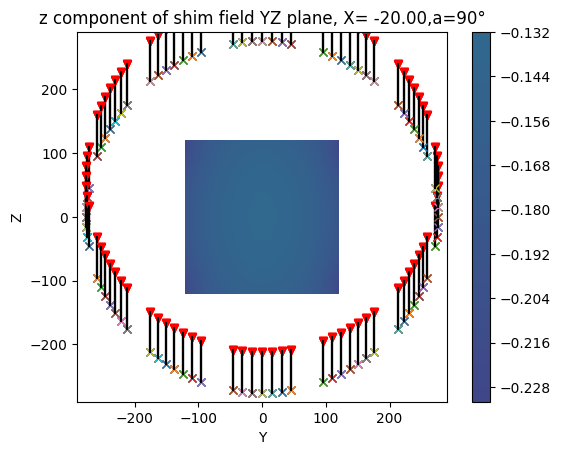

In [13]:
resolution = 1/resolution_of_sph_fit*1e3

x = b0map_iter1.xDim_SPH_fine*1e0
y = b0map_iter1.yDim_SPH_fine*1e0
z = b0map_iter1.zDim_SPH_fine*1e0

ONEINSERTFIELD = shimming_magnets[0].B0*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)): #range(40):#

    position = positions[idx]
    

    alpha =  np.pi/2 
    
    magnet = shimming_magnets[idx]
    magnet.rotation_yz = -alpha 
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])

    ONEINSERTFIELD += magnet.B0  

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    dispveclen = 64 # len of arrow
    direction = [dispveclen*np.cos(alpha),dispveclen*np.sin(alpha)]
    ax.plot(position[1]*1000+direction[0],position[2]*1000+direction[1],'rv')
    
    ax.plot([position[1]*1000,position[1]*1000+direction[0]],[position[2]*1000,position[2]*1000+direction[1]],'k-')

ONEINSERTFIELD*=1e3 #mT
scale = 0.4
yzsliceindex = 20 # Checking for slice 20
mpbl = ax.contourf(y,z,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)#,vmin=np.nanmin(ONEINSERTFIELD[:,:,:,2]),vmax=np.nanmax(ONEINSERTFIELD[:,:,:,2]))#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f,a=%.0f°'%(x[yzsliceindex],alpha*180/np.pi))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")
plt.show()

And we can render the fields of all shim magnets in the volume of a ball. This previous setup of all in the same direction will be our "initial guess" of a shimming configuration

In [14]:
MagnetsField_simulated = shimming_magnets[2].B0[:,:,:,2]*0
yzsliceidx = 0   

for magnet_index, pos in enumerate(positions):

    alpha = np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)

    MagnetsField_simulated += cheapfield_onemagnet

#mask the one magnet field:
MagnetsField_simulated*= b0map_iter1.sphere_mask

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))

homo of one magnet ppm 256741
mean mT 0.11


For example, we can see the effect of a ring with all the magnets oriented in one direction

<Figure size 640x480 with 0 Axes>

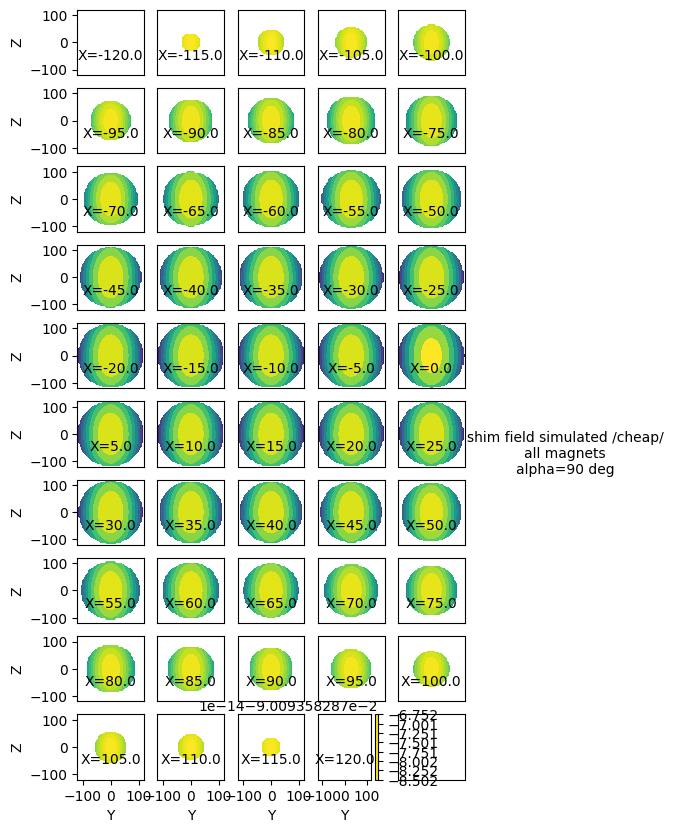

In [15]:
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_raw = b0map_iter1.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.5, 5, 'shim field simulated /cheap/\nall magnets\nalpha=%.0f deg'%(alpha*180/np.pi) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(y,z,np.transpose(MagnetsField_simulated[i*5+j,:,:]),vmin=np.nanmin(MagnetsField_simulated),vmax=np.nanmax(MagnetsField_simulated),origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')


plt.savefig('./pics/cheap_simulated.png',format="png")
plt.savefig('./pics/cheap_simulated.pdf',format="pdf")
plt.show()

## Masking/Stacking Shim Field

### Create Mask

Now, with the positions and fields able to be rendered, we can create a spherical mask.

(49, 49, 49, 3, 336)


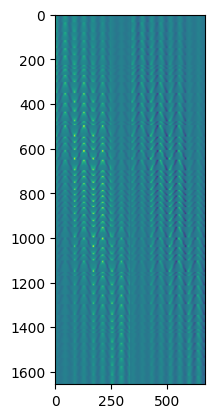

In [16]:

b0map = b0map_iter1

# make a spherical mask with diameter DSV
DSV = b0map.path.radius*2 # 
DSV_INNER = b0map.path.radius*1.98 # We can use smaller numbers (1.95 or 1.96) away from 2

sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields = magnetFields[sphereMask == 1, :,:].astype(float) 
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) 

plt.imshow(maskedFields_stacked) 

### Rotate mask components

Now, we can rotate the vector to be able to visualize

In [17]:
print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

(1656, 672)
(672,)
(1656,)


### Rendering Field

We can now render the measured field, the contour of it, our initial shim (all oriented same direction) and the sum of the fields (measured + shim)

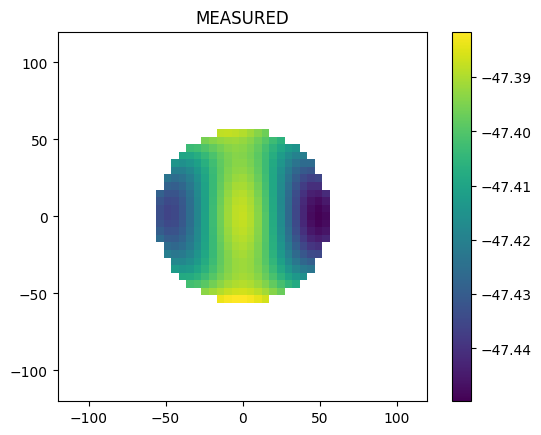

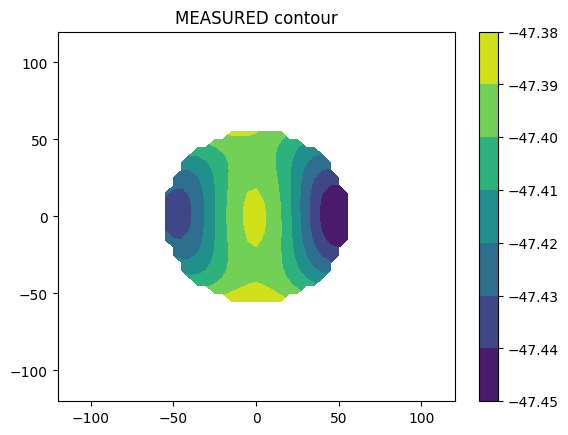

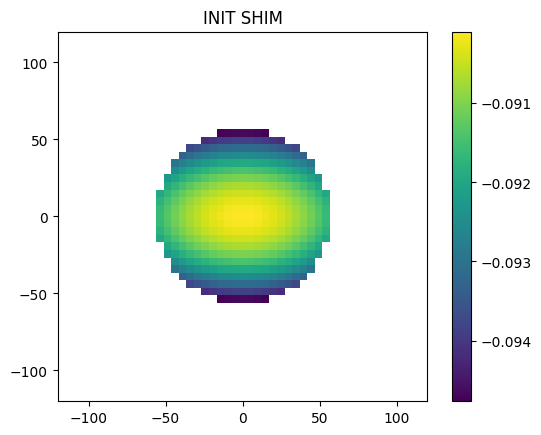

(1656,)
(49, 49, 49)


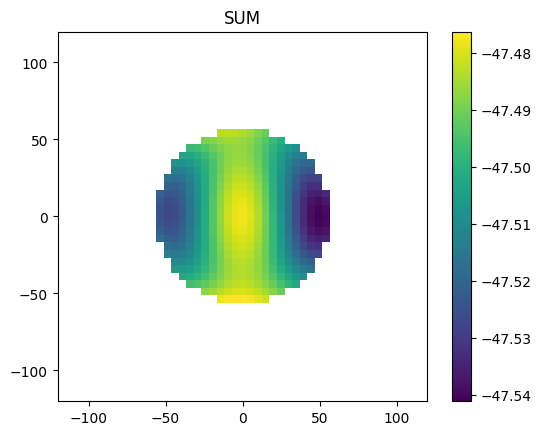

In [18]:
plt.imshow(FieldMeasured_init[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED')
plt.colorbar()
plt.show()

plt.contourf(y,z,FieldMeasured_init[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED contour')
plt.colorbar()
plt.show()

plt.imshow(MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('INIT SHIM')
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured_init[3,:,:]+1*MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('SUM')

initialFieldMasked = FieldMeasured_init[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured_init))

## Optimization

### Intro and setup functions

In order to optimize the orientation of our shimming magnets, we will use a Least Squares Optimization, that will have as output an optimized vector of magnet rotations. First, we define a few functions 

In [19]:
# We get our data fitting from the current shimming vector, will be our "cost" function

def _dataFitting(shimVector):
            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)]) #!!!240918
            shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

# Create a function that takes the yz number, and returns the tray it corresponds to adjust

def yz_to_insert_number(y:float,z:float):
        # we have a ring -> circle, so 2 pi radians. 
        # each point is defined by the angle from OY towards OZ

        angle = np.arctan2(z,y)
        # there are 12 treays, so we divide in 12
        angle_per_segment = 2*np.pi/12
        insert_nr = round(angle/angle_per_segment) + 6
        
        return (insert_nr)
        
# We get the insert number -> ring and position.

def insert_number_from_position(pos: tuple):
        for idx,ring_position in enumerate(ringPositions):
                if pos[0] == ring_position:
                        ring_number = idx
        
        insert_number = yz_to_insert_number(pos[1],pos[2])
        return('RING %.0f INSERT %.0f'%(ring_number,insert_number))

### Render guess

Now, we render the field of a random set to be optimized. We can see the field measured, the shim field, and the sum of both, in yz planes.

RING 0 INSERT 5 soll: 90  ist(?): 90
RING 0 INSERT 5 soll: 90  ist(?): 90
RING 0 INSERT 5 soll: 90  ist(?): 90
RING 0 INSERT 5 soll: 90  ist(?): 90
RING 0 INSERT 5 soll: 90  ist(?): 90
RING 0 INSERT 5 soll: 90  ist(?): 90
RING 0 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 1 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 2 INSERT 5 soll: 90  ist(?): 90
RING 3 INSERT 5 soll: 90  ist(?): 90
RING 3 INSERT 5 soll: 90  ist(?): 90
RING 3 INSERT 5 soll: 90  ist(?): 90
RING 3 INSERT 5 soll: 90  ist(?): 90
RING 3 INSERT 5 soll: 90  ist(?): 90
RING 3 INSERT 5 soll: 90  ist(?): 90
R

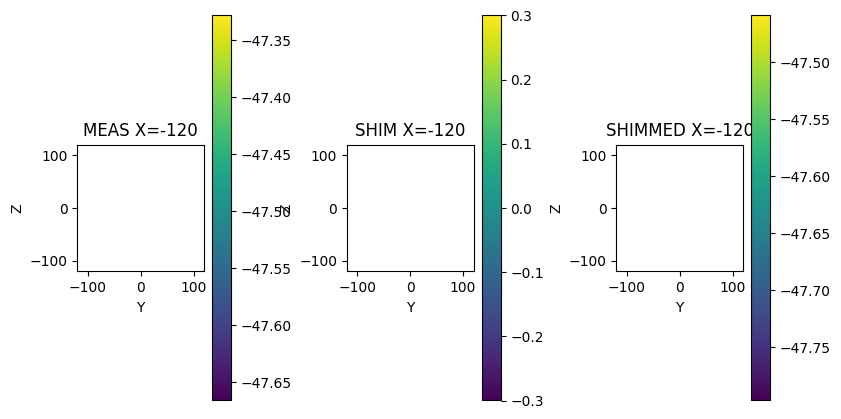

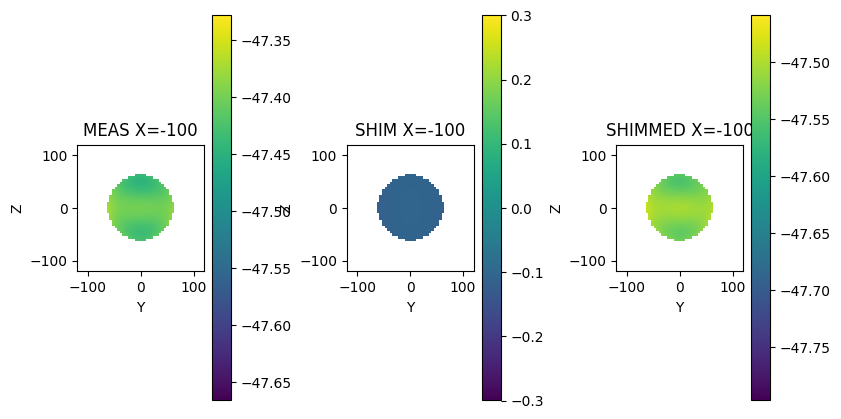

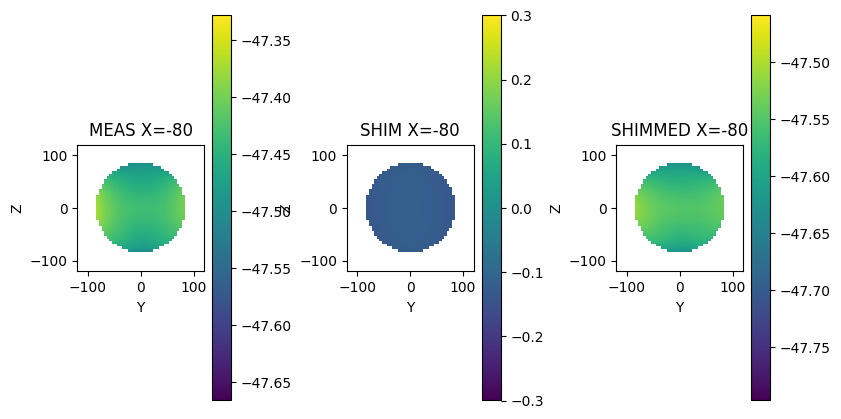

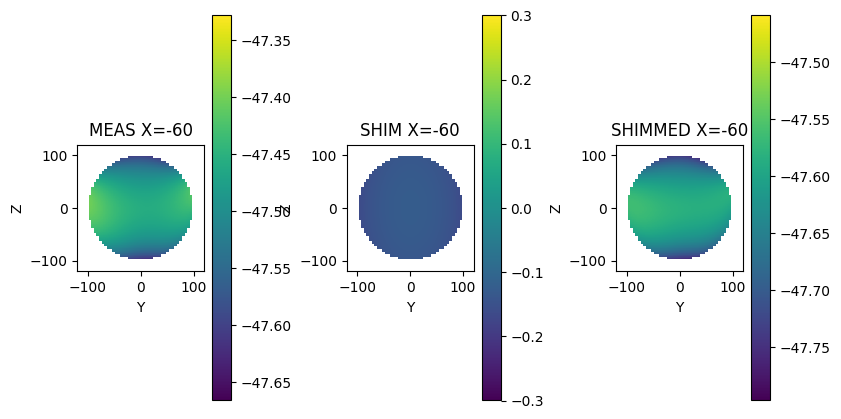

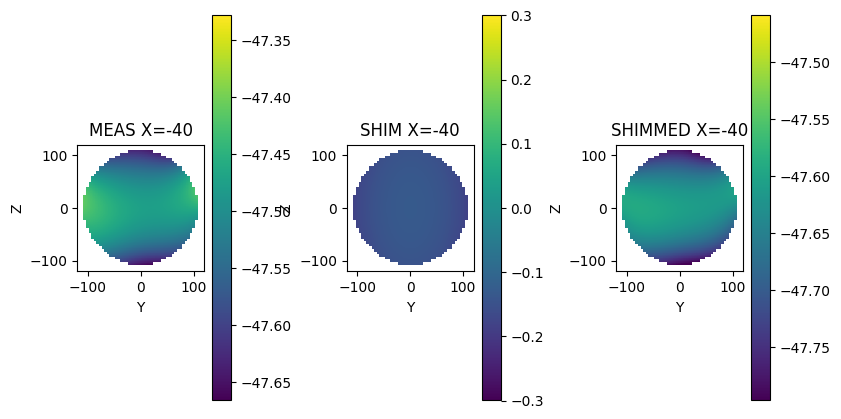

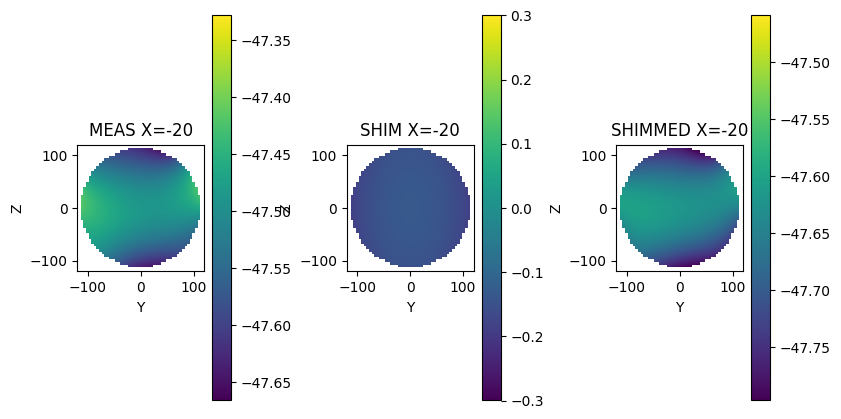

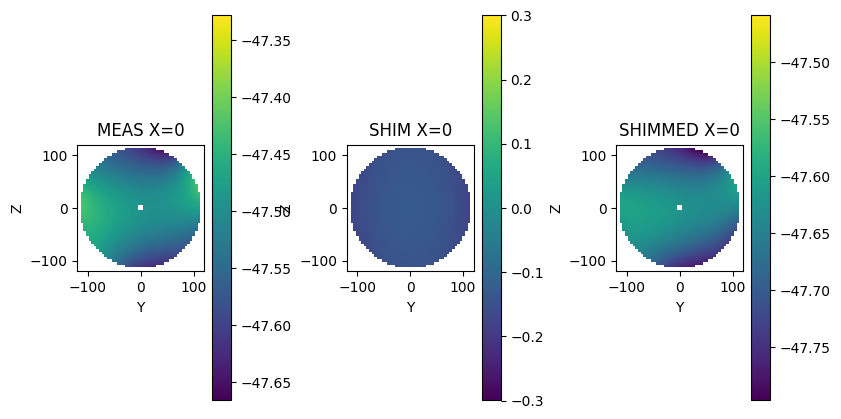

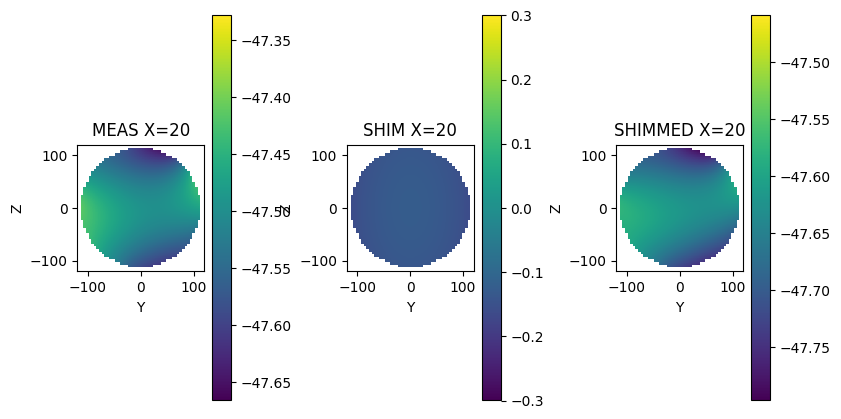

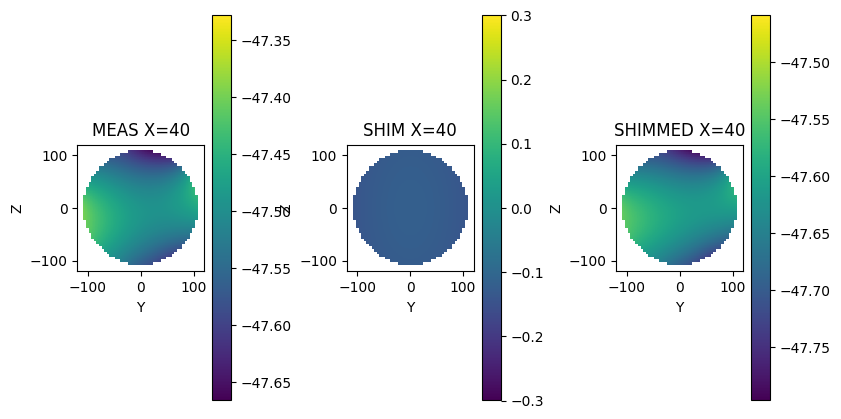

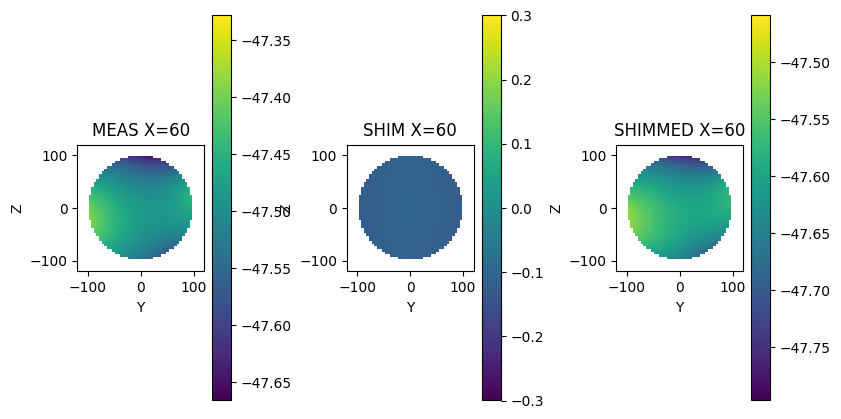

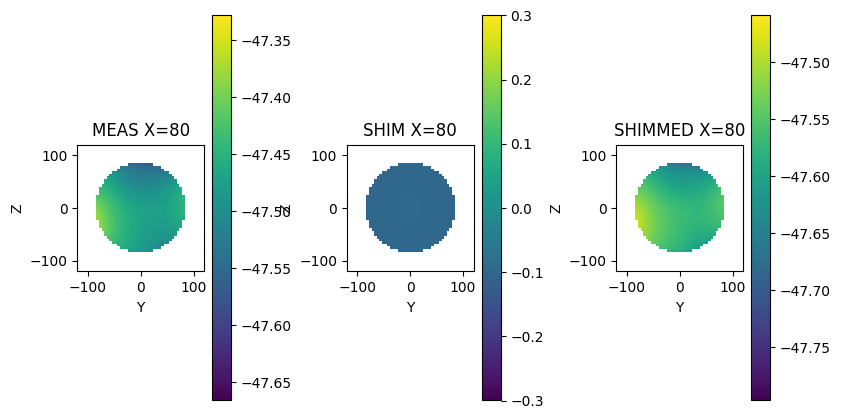

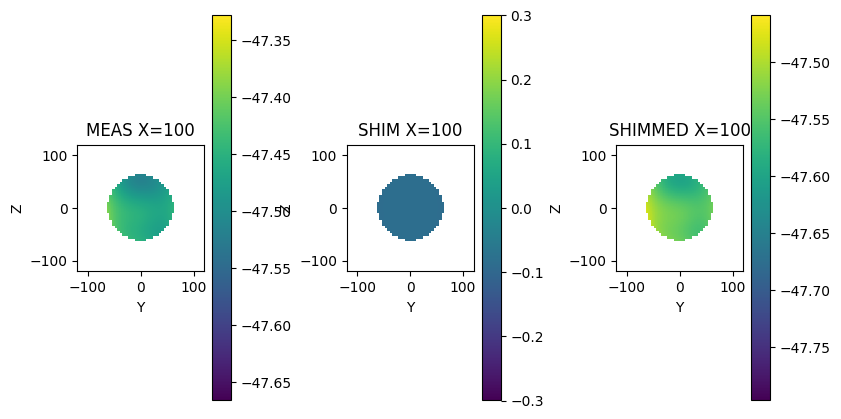

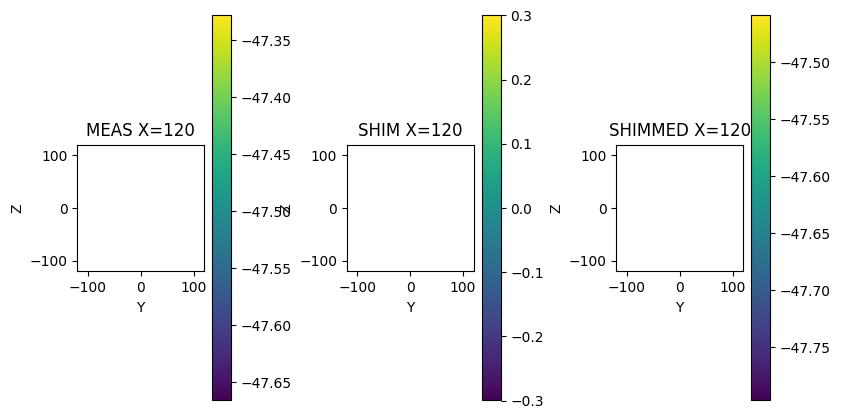

In [20]:
optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+np.pi/2
for i in range(len(optimized_vector_of_magnet_rotations)):
        pos = positions[i]
        if pos[1] > 180e-3:
                if pos[2] < -50e-3 and pos[2] > -200e-3:
                        angle_to_assign = np.pi/2
                        print(insert_number_from_position(pos),'soll: %.0f'%(optimized_vector_of_magnet_rotations[i]*180/np.pi),' ist(?): %.0f'%(angle_to_assign*180/np.pi))
                        optimized_vector_of_magnet_rotations[i] = angle_to_assign


shimField_Rotated = np.matmul(magnetFields[...,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))
shimField_Rotated*=b0map_iter1.sphere_mask

FieldShimmed = FieldMeasured_init+shimField_Rotated


shimoffset = np.nanmean(FieldShimmed)-np.nanmean(FieldMeasured_init)



for slicenr in range(0,len(xvals_raw),int(len(xvals_raw)/10)):
#slicenr = 17
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,5))

    xxx = axes[0].imshow(np.transpose(FieldMeasured_init[slicenr,:,:]),origin='lower',vmin=np.nanmin(FieldMeasured_init[:,:,:]),vmax = np.nanmax(FieldMeasured_init[:,:,:]),extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[0].set_title('MEAS X=%.0f'%xvals_raw[slicenr])
    axes[0].set_xlabel('Y')
    axes[0].set_ylabel('Z')
    


    xxx = axes[1].imshow(np.transpose(shimField_Rotated[slicenr,:,:]),vmin=-3e-1,vmax=3e-1,origin='lower',extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[1].set_title('SHIM X=%.0f'%xvals_raw[slicenr])
    axes[1].set_xlabel('Y')
    axes[1].set_ylabel('Z')
    
    


    xxx = axes[2].imshow(np.transpose(FieldShimmed[slicenr,:,:]),origin='lower',
            vmin=np.nanmin(FieldMeasured_init[:,:,:]+shimoffset),
            vmax = np.nanmax(FieldMeasured_init[:,:,:]+shimoffset),
            extent=[-120,120,-120,120])
    plt.colorbar(mappable = xxx)
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Z')
    
    axes[2].set_title('SHIMMED X=%.0f'%xvals_raw[slicenr])
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Z')
    
    plt.subplots_adjust(wspace=0.7)
    plt.show()

### Optimize!!

We now run lsq optimization to a rotation vector. We again will use our initial guess, but in the future we can use the optimized vector

In [21]:
# This vector can be changed to the current optimized vector, in order to improve the optimization
vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+np.pi/2 #np.load('optIter1_4rings.npy')
 
# We get our "cost" function
cost = _dataFitting(vector_of_magnet_rotations)
print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares
initialGuess = vector_of_magnet_rotations
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-5,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))

5817234.12261321
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0278e+10                                    2.98e+09    


c:\Users\jarc4\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


       1              2         7.3748e+09      1.29e+10       5.83e+00       9.50e+08    
       2              3         4.2944e+09      3.08e+09       5.54e+00       1.01e+09    
       3              4         2.5223e+09      1.77e+09       5.82e+00       6.45e+08    
       4              5         1.7678e+09      7.55e+08       6.22e+00       3.08e+08    
       5              6         1.2347e+09      5.33e+08       2.70e+00       1.74e+08    
       6              7         7.5387e+08      4.81e+08       7.20e+00       1.95e+08    
       7              8         5.5491e+08      1.99e+08       3.14e+00       1.11e+08    
       8              9         4.0463e+08      1.50e+08       4.38e+00       5.93e+07    
       9             10         3.6099e+08      4.36e+07       1.31e+00       5.45e+07    
      10             11         3.2062e+08      4.04e+07       2.83e+00       4.59e+07    
      11             12         2.3123e+08      8.94e+07       4.23e+00       5.28e+07    

### Optimization check

Now, we save our magnet rotation vector, render the shimmed field, and calculate the new homogeneity

In [22]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter1_4rings.npy',optimized_vector_of_magnet_rotations)

shimField_Rendered = shimming_magnets[0].B0[:,:,:,2]*0 # container for the shimmed field

# render the shim field by given rotations of each shimming magnet
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]

    magnet.rotation_yz = -alpha # beware of the sign
    magnet.bRem = bRem*1
    magnet.render_field(grid=coordinate_grid)
    shimField_Rendered += magnet.B0[:,:,:,2]

shimField_Rendered *= 1.0e3

shimmed_Field_simulated_RENDERED = FieldMeasured_init+shimField_Rendered # shimmed field computed with rendering fields of each magnet
shimField_Rotated = np.matmul(magnetFields[...,1,:], -np.sin(lsqData.x)) + \
    np.matmul(magnetFields[...,2,:], np.cos(lsqData.x)) # shimmed field computed with rotating the pre-rendered fields

shimmed_Field_simulated_ROTATED = FieldMeasured_init+shimField_Rotated

homoinit = (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6
homo_cheap = (np.nanmax(shimmed_Field_simulated_ROTATED)-np.nanmin(shimmed_Field_simulated_ROTATED))/np.nanmean(shimmed_Field_simulated_ROTATED)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(FieldMeasured_init)),abs(np.nanmean(shimmed_Field_simulated_ROTATED))))


homoinit = (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6
homo_fair = (np.nanmax(shimmed_Field_simulated_RENDERED)-np.nanmin(shimmed_Field_simulated_RENDERED))/np.nanmean(shimmed_Field_simulated_RENDERED)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(FieldMeasured_init)),abs(np.nanmean(shimmed_Field_simulated_RENDERED))))

shimoffset = np.nanmean(shimmed_Field_simulated_ROTATED) - np.nanmean(FieldMeasured_init)

ROTATION OF CHEAP MAGNET:-80
[ 0.00000000e+00  3.83734325e-09 -2.28853033e-08]
1.35
ROTATION OF CHEAP MAGNET:-60
[ 0.00000000e+00  1.17500828e-08 -2.00099442e-08]
1.35
ROTATION OF CHEAP MAGNET:-47
[ 0.00000000e+00  1.58847734e-08 -1.69155634e-08]
1.35
ROTATION OF CHEAP MAGNET:-46
[ 0.00000000e+00  1.62493856e-08 -1.65656204e-08]
1.35
ROTATION OF CHEAP MAGNET:-51
[ 0.00000000e+00  1.45100581e-08 -1.81085760e-08]
1.35
ROTATION OF CHEAP MAGNET:-61
[ 0.00000000e+00  1.12417431e-08 -2.02998897e-08]
1.35
ROTATION OF CHEAP MAGNET:-74
[ 0.00000000e+00  6.55995623e-09 -2.22582408e-08]
1.35
ROTATION OF CHEAP MAGNET:-127
[ 0.00000000e+00 -1.38932025e-08 -1.85860495e-08]
1.35
ROTATION OF CHEAP MAGNET:-143
[ 0.00000000e+00 -1.86352819e-08 -1.38270959e-08]
1.35
ROTATION OF CHEAP MAGNET:-159
[ 0.00000000e+00 -2.17074294e-08 -8.20059868e-09]
1.35
ROTATION OF CHEAP MAGNET:-174
[ 0.00000000e+00 -2.30843521e-08 -2.36114366e-09]
1.35
ROTATION OF CHEAP MAGNET:-188
[ 0.00000000e+00 -2.29784096e-08  3.233419

As well as get the maximum and minimum, test the field center, and the intervals 

In [23]:
print("Maximum (rendered and rotated)")
print(np.nanmax(shimField_Rendered)) # with adjustable bRem, same rotations
print(np.nanmax(shimField_Rotated))

print("\nCenter")
xmid = int(len(x)/2)
ymid = int(len(y)/2)
zmid = int(len(z)/2)
fieldincenter_init = FieldMeasured_init[xmid-1,ymid,zmid]
fieldincenter_shimmed = shimmed_Field_simulated_RENDERED[xmid-1,ymid,zmid]
print("field in center before: %.2f"%fieldincenter_init)
print("field in center after: %.2f"%fieldincenter_shimmed)

print("\nIntervals in Measured and Simulated Shimmed")
print('Measured')
print('min:',np.nanmax(FieldMeasured_init), ', max:',np.nanmin(FieldMeasured_init), ', mean: ''<',np.nanmean(FieldMeasured_init),'>')
print('Shimmed')
print('max:',np.nanmin(shimmed_Field_simulated_RENDERED),', min:',np.nanmax(shimmed_Field_simulated_RENDERED), ', mean: <',np.nanmean(shimmed_Field_simulated_RENDERED),'>')

Maximum (rendered and rotated)
0.45349973
0.45349992437332576

Center
field in center before: -47.49
field in center after: -47.30

Intervals in Measured and Simulated Shimmed
Measured
min: -47.3284662280477 , max: -47.66603589622701 , mean: < -47.49254835563982 >
Shimmed
max: -47.35046137842519 , min: -47.21710710863242 , mean: < -47.296988768844514 >


## Plotting the Shim and Shimmed Field

### Shim Field

<Figure size 640x480 with 0 Axes>

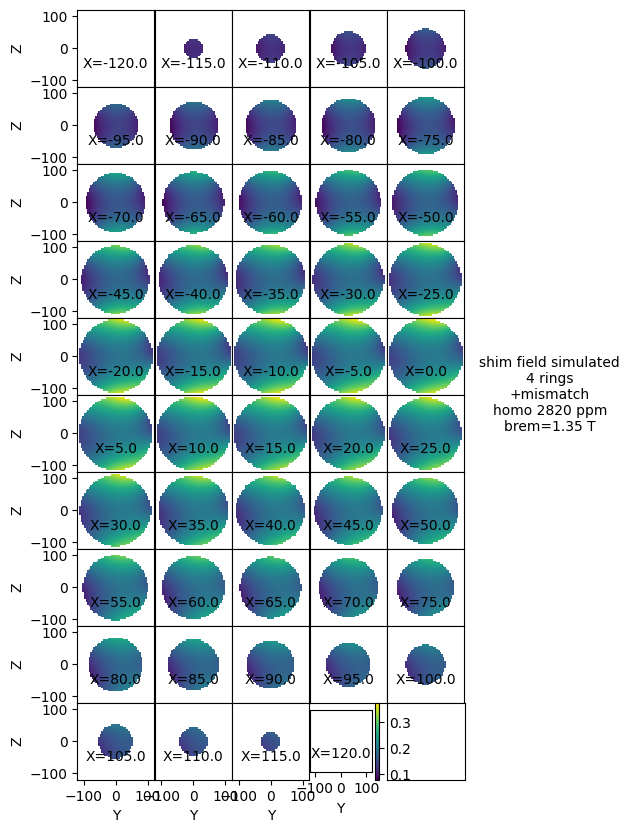

In [24]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_raw = b0map_iter1.xDim_SPH_fine

simulated_shim_Field_masked = shimField_Rendered*b0map_iter1.sphere_mask


for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.1, 5, 'shim field simulated\n4 rings\n+mismatch\nhomo %.0f ppm\nbrem=%.2f T'%(abs(homo_fair),shimming_magnets[0].bRem), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(simulated_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(simulated_shim_Field_masked),np.nanmax(simulated_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER1_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER1_1RING.pdf',format="pdf")
plt.show()

### Shimmed Field

shimmed simulated HOMO,ppm: 2819.50866776135


<Figure size 640x480 with 0 Axes>

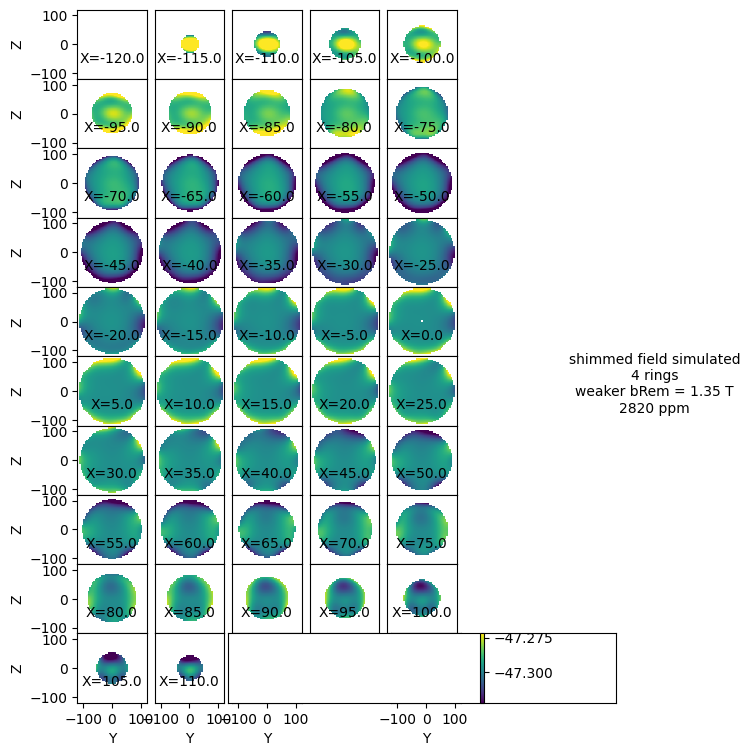

In [25]:
# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(9, 9))

SIMULATED_SHIMMED_FIELD_TO_PLOT = shimmed_Field_simulated_RENDERED

shimoffset = np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT) - np.nanmean(FieldMeasured_init)

homoshimmed = abs((np.nanmax(SIMULATED_SHIMMED_FIELD_TO_PLOT)-np.nanmin(SIMULATED_SHIMMED_FIELD_TO_PLOT))/np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)*1e6)

print('shimmed simulated HOMO,ppm:',homoshimmed)

xvals_raw = b0map_iter1.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.1, 4.6, 'shimmed field simulated\n4 rings\nweaker bRem = %.2f T\n%.0f ppm'%(shimming_magnets[0].bRem,homoshimmed) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break

        xxx = axes[i,j].imshow(np.transpose(SIMULATED_SHIMMED_FIELD_TO_PLOT[i*5+j,:,:]),vmin=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)-0.025,vmax=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)+0.025,origin = 'lower',extent=[-120,120,-120,120])        
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        plt.xlabel('Y')
        plt.ylabel('Z')

        
plt.subplots_adjust(wspace=-0.8, hspace=0.0)
plt.savefig('./pics/shimmed_field_ITER1_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER1_1ring.pdf',format="pdf")
plt.show()

## Magnet Rotations for each ring 

### Ring 0

nr 0 Y 0.27211479674710887 Z -0.04614691096140277 a 80.48135339536412
nr 1 Y 0.2742709847847707 Z -0.030845208788272026 a 59.578025581943564
nr 2 Y 0.27556740718070843 Z -0.015446815196073495 a 46.799996473006345
nr 3 Y 0.276 Z 0.0 a 45.552136225166755
nr 4 Y 0.27556740718070843 Z 0.0154468151960735 a 51.295465708989184
nr 5 Y 0.2742709847847707 Z 0.030845208788272037 a 61.023041397249244
nr 6 Y 0.27211479674710887 Z 0.04614691096140277 a 73.57868262057312
nr 7 Y 0.2587317822093368 Z 0.09609300117480107 a 126.77837258399211
nr 8 Y 0.2529482447387227 Z 0.11042275799670676 a 143.42514670649987
nr 9 Y 0.2463717826715406 Z 0.12440636922299107 a 159.30451639448847
nr 10 Y 0.2390230114445051 Z 0.13799999999999998 a 174.1599083220822
nr 11 Y 0.2309249674754671 Z 0.15116103795771738 a 188.00981702712778
nr 12 Y 0.22210303595045067 Z 0.16384822678806393 a 200.99351015321173
nr 13 Y 0.21258487124793404 Z 0.17602179557230782 a 213.40849951145864
nr 14 Y 0.17602179557230782 Z 0.21258487124793404 a

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

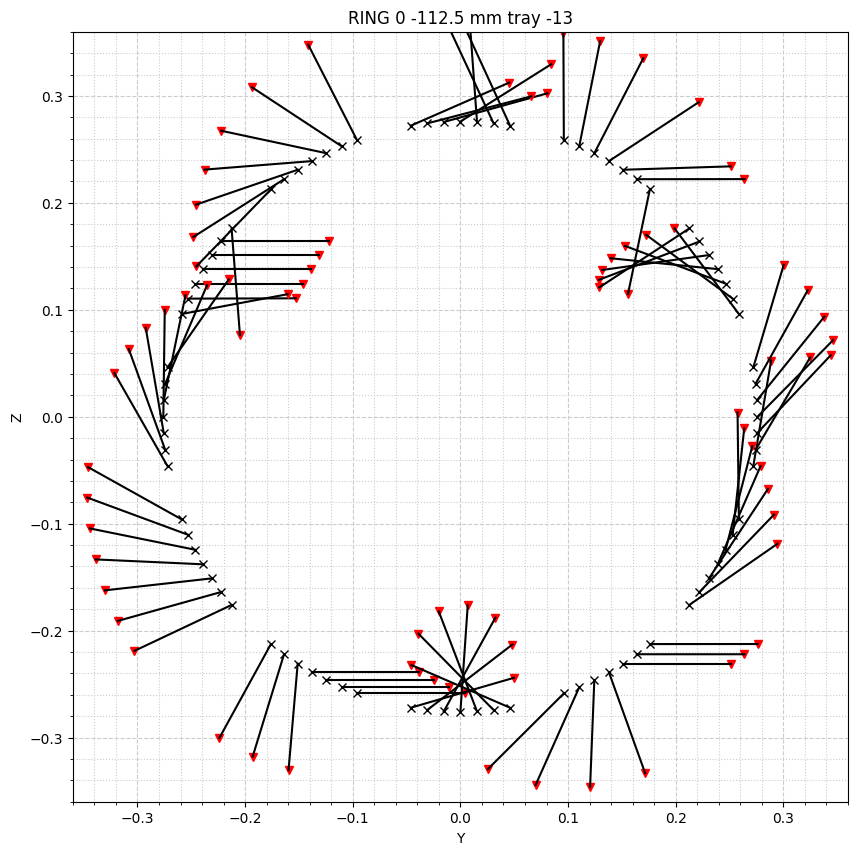

In [26]:
# MAGNET ROTATIONS RING 0
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 0
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1]
        ZPOINT = tmppos[2]
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)]
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Y')
plt.ylabel('Z')

### Ring 1

nr 84 Y 0.27211479674710887 Z -0.04614691096140277 a 2.783868888603685e-36
nr 85 Y 0.2742709847847707 Z -0.030845208788272026 a 7.387894984577513e-38
nr 86 Y 0.27556740718070843 Z -0.015446815196073495 a 1.542141321853578e-36
nr 87 Y 0.276 Z 0.0 a 7.038854636244423e-35
nr 88 Y 0.27556740718070843 Z 0.0154468151960735 a 2.116873627860113e-35
nr 89 Y 0.2742709847847707 Z 0.030845208788272037 a 7.553334411993882e-31
nr 90 Y 0.27211479674710887 Z 0.04614691096140277 a 1.0378021099966628e-24
nr 91 Y 0.2587317822093368 Z 0.09609300117480107 a 306.1270029795224
nr 92 Y 0.2529482447387227 Z 0.11042275799670676 a 276.5708197011838
nr 93 Y 0.2463717826715406 Z 0.12440636922299107 a 6.152584401921895e-12
nr 94 Y 0.2390230114445051 Z 0.13799999999999998 a 8.03617442022577e-17
nr 95 Y 0.2309249674754671 Z 0.15116103795771738 a 1.637595387677345e-21
nr 96 Y 0.22210303595045067 Z 0.16384822678806393 a 5.627603914678338e-26
nr 97 Y 0.21258487124793404 Z 0.17602179557230782 a 4.964894652301296e-30
nr 9

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

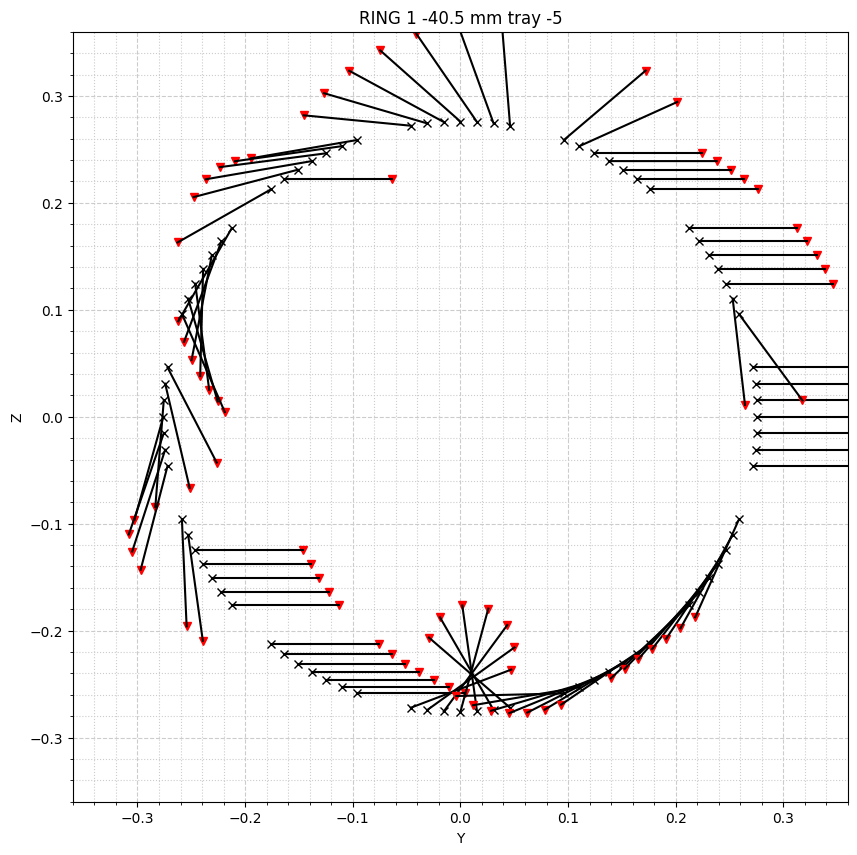

In [27]:
# MAGNET ROTATIONS RING 1
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 1
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] 
        ZPOINT = tmppos[2] 
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] 
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Y')
plt.ylabel('Z')

### Ring 2

nr 168 Y 0.27211479674710887 Z -0.04614691096140277 a 271.8687708786054
nr 169 Y 0.2742709847847707 Z -0.030845208788272026 a 5.1089046839479594e-39
nr 170 Y 0.27556740718070843 Z -0.015446815196073495 a 1.1058825413925648e-33
nr 171 Y 0.276 Z 0.0 a 2.7162629819523786e-28
nr 172 Y 0.27556740718070843 Z 0.0154468151960735 a 1.2733948166248355e-21
nr 173 Y 0.2742709847847707 Z 0.030845208788272037 a 1.3588732150801045e-13
nr 174 Y 0.27211479674710887 Z 0.04614691096140277 a 4.53109789667172e-05
nr 175 Y 0.2587317822093368 Z 0.09609300117480107 a 109.96783261251052
nr 176 Y 0.2529482447387227 Z 0.11042275799670676 a 144.72748545693932
nr 177 Y 0.2463717826715406 Z 0.12440636922299107 a 171.43575450457328
nr 178 Y 0.2390230114445051 Z 0.13799999999999998 a 194.34897995218014
nr 179 Y 0.2309249674754671 Z 0.15116103795771738 a 8.355742697379489e-15
nr 180 Y 0.22210303595045067 Z 0.16384822678806393 a 1.8643220876603196e-22
nr 181 Y 0.21258487124793404 Z 0.17602179557230782 a 3.3915598510883

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

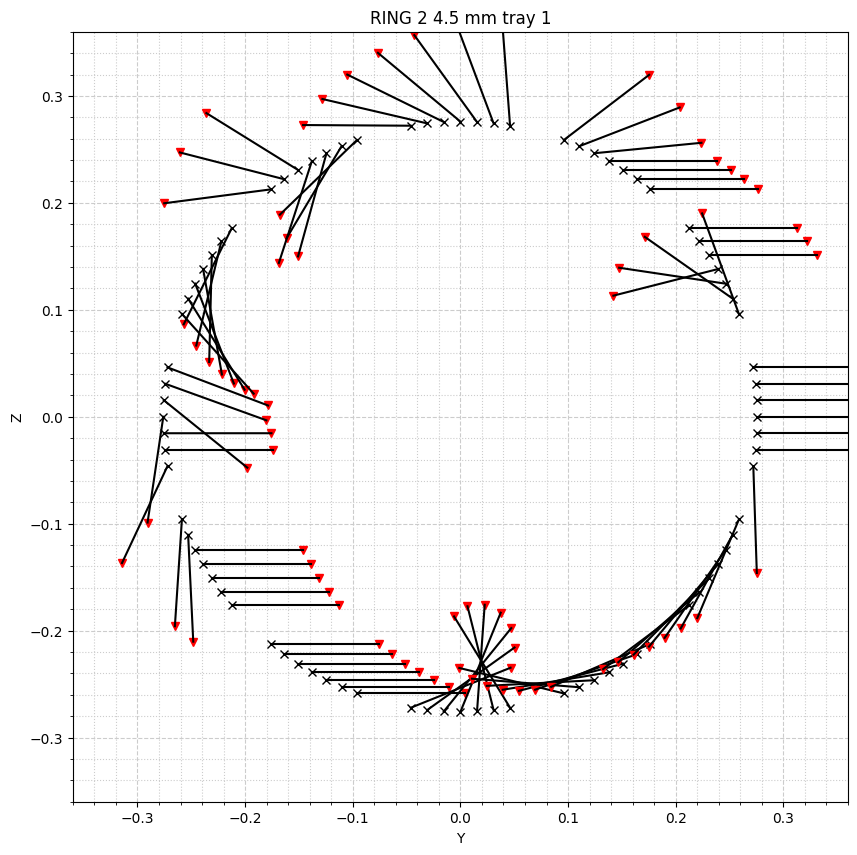

In [28]:
# MAGNET ROTATIONS RING 2
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 2
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] 
        ZPOINT = tmppos[2] 
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)]
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

        
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')

### Ring 3

nr 252 Y 0.27211479674710887 Z -0.04614691096140277 a 51.132708837714304
nr 253 Y 0.2742709847847707 Z -0.030845208788272026 a 65.95265000829778
nr 254 Y 0.27556740718070843 Z -0.015446815196073495 a 91.84101350833984
nr 255 Y 0.276 Z 0.0 a 122.2995612659309
nr 256 Y 0.27556740718070843 Z 0.0154468151960735 a 150.7144436074052
nr 257 Y 0.2742709847847707 Z 0.030845208788272037 a 172.54317545966458
nr 258 Y 0.27211479674710887 Z 0.04614691096140277 a 188.91824308858554
nr 259 Y 0.2587317822093368 Z 0.09609300117480107 a 226.72421870010592
nr 260 Y 0.2529482447387227 Z 0.11042275799670676 a 236.12421179421654
nr 261 Y 0.2463717826715406 Z 0.12440636922299107 a 245.28476658701567
nr 262 Y 0.2390230114445051 Z 0.13799999999999998 a 254.3491832407059
nr 263 Y 0.2309249674754671 Z 0.15116103795771738 a 1.9716798435698106e-35
nr 264 Y 0.22210303595045067 Z 0.16384822678806393 a 1.3346734755445835e-35
nr 265 Y 0.21258487124793404 Z 0.17602179557230782 a 1.2932534557867227e-34
nr 266 Y 0.176021

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

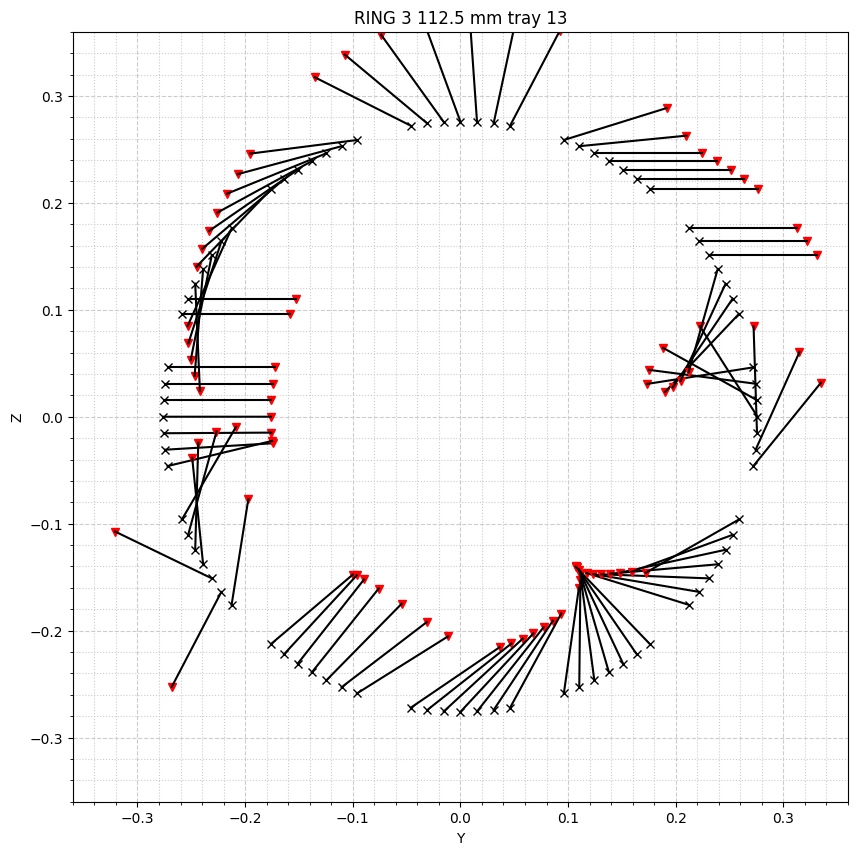

In [29]:
# MAGNET ROTATIONS RING 3
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 3
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] 
        ZPOINT = tmppos[2] 
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] 
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')

### All in one!

nr 0 Y 0.27211479674710887 Z -0.04614691096140277 a 80.48135339536412
nr 1 Y 0.2742709847847707 Z -0.030845208788272026 a 59.578025581943564
nr 2 Y 0.27556740718070843 Z -0.015446815196073495 a 46.799996473006345
nr 3 Y 0.276 Z 0.0 a 45.552136225166755
nr 4 Y 0.27556740718070843 Z 0.0154468151960735 a 51.295465708989184
nr 5 Y 0.2742709847847707 Z 0.030845208788272037 a 61.023041397249244
nr 6 Y 0.27211479674710887 Z 0.04614691096140277 a 73.57868262057312
nr 7 Y 0.2587317822093368 Z 0.09609300117480107 a 126.77837258399211
nr 8 Y 0.2529482447387227 Z 0.11042275799670676 a 143.42514670649987
nr 9 Y 0.2463717826715406 Z 0.12440636922299107 a 159.30451639448847
nr 10 Y 0.2390230114445051 Z 0.13799999999999998 a 174.1599083220822
nr 11 Y 0.2309249674754671 Z 0.15116103795771738 a 188.00981702712778
nr 12 Y 0.22210303595045067 Z 0.16384822678806393 a 200.99351015321173
nr 13 Y 0.21258487124793404 Z 0.17602179557230782 a 213.40849951145864
nr 14 Y 0.17602179557230782 Z 0.21258487124793404 a

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

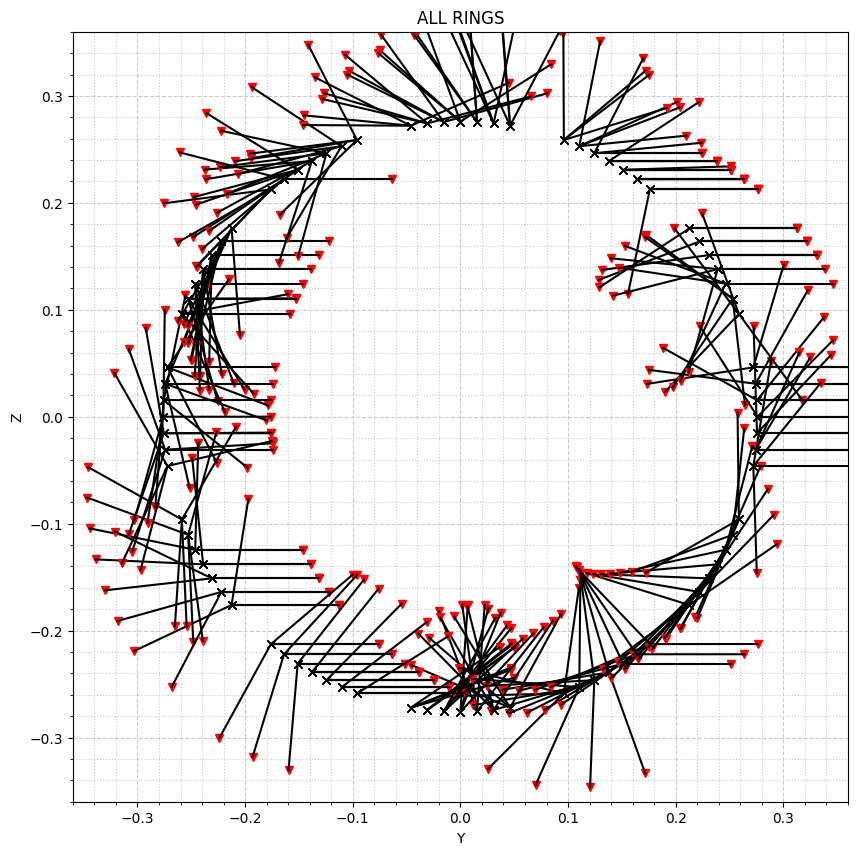

In [30]:
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('ALL RINGS')
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):

    angle = optimized_vector_of_magnet_rotations[idx]
    YPOINT = tmppos[1] 
    ZPOINT = tmppos[2] 
    print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
    axes.plot(YPOINT,ZPOINT,'xk')
    direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)]
    axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
    axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')